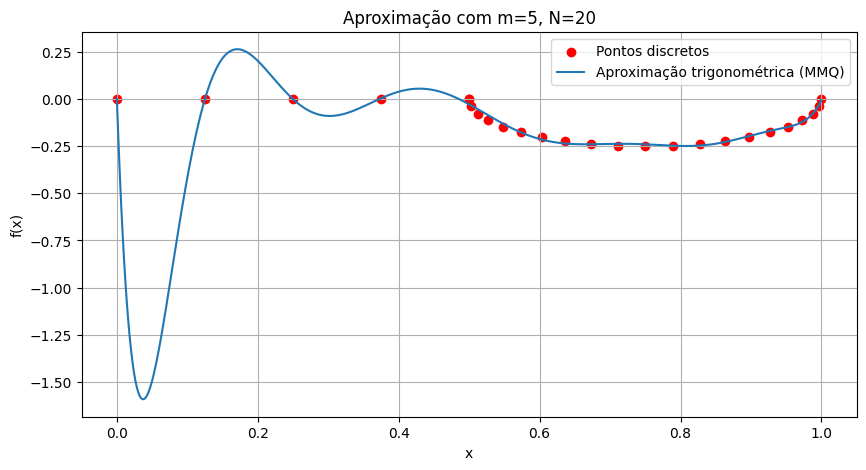

Coeficientes encontrados (a):
a[0] = 0.000000
a[1] = 9558046.046549
a[2] = -8483046.905297
a[3] = -13602941.793294
a[4] = 8385648.061988
a[5] = 4105336.145118
a[6] = -3594992.057454
a[7] = 372707.749400
a[8] = 661973.589235
a[9] = -516810.429759
a[10] = -30254.551603
a[11] = 83662.281978


In [ ]:
# ==========================================================
# SME0206 – Apresentação 01 - Grupo 3
# Aproximação de função por MMQ com base trigonométrica
# ==========================================================

import numpy as np
import matplotlib.pyplot as plt


# 1. Definição dos pontos discretos


def gerar_pontos(N=20):
    """
    Gera os pontos discretos da função f(x).
    - N: número de subdivisões (par) no semicírculo
    """

    # Pontos na reta (x ∈ [0, 1/2], f(x)=0)
    reta_x = np.linspace(0, 0.5, 5)  # 5 pontos: 0, 1/8, 1/4, 3/8, 1/2
    reta_y = np.zeros_like(reta_x)

    # Pontos no semicírculo
    k = np.arange(0, N+1)
    xc = 3/4
    yc = 0
    r = 1/4

    semi_x = xc + r * np.cos(np.pi * (1 - k/N))
    semi_y = yc - r * np.sin(np.pi * (1 - k/N))

    # Junta tudo
    X = np.concatenate([reta_x, semi_x])
    Y = np.concatenate([reta_y, semi_y])

    return X, Y

# 2. Funções base trigonométricas


def base_trig(x, m):
    """
    Constrói a matriz G de funções base g_i(x).
    g_0(x) = 0
    g_1(x) = 1
    g_{2k}(x) = sin(kx)
    g_{2k+1}(x) = cos(kx)
    """
    n = len(x)
    G = np.zeros((n, 2*m+2))

    for k in range(m+1):
        if 2*k < G.shape[1]:
            G[:, 2*k] = np.sin(k*x)  # g_{2k}
        if 2*k+1 < G.shape[1]:
            G[:, 2*k+1] = np.cos(k*x)  # g_{2k+1}

    # Corrigir g0(x) = 0 e g1(x)=1
    G[:,0] = 0
    G[:,1] = 1

    return G

# 3. Método dos Mínimos Quadrados


def mmq(X, Y, m):
    """
    Aplica o MMQ discreto para obter os coeficientes 'a'
    que aproximam f(x) pelos g_i(x).
    """
    G = base_trig(X, m)
    a = np.linalg.lstsq(G, Y, rcond=None)[0]
    return a

def aproximacao(x, a, m):
    """
    Calcula F(x) = soma(a_i g_i(x)) usando os coeficientes a.
    """
    G = base_trig(x, m)
    return G @ a


# 4. Execução principal


# Escolha dos parâmetros
N = 20   # número de pontos no semicírculo (par, >=10)
m = 5    # número máximo de harmônicos trigonométricos

# Geração dos pontos discretos
X, Y = gerar_pontos(N)

# Ajuste por MMQ
a = mmq(X, Y, m)

# Avaliação da aproximação
x_plot = np.linspace(0, 1, 500)  # domínio de visualização
y_aprox = aproximacao(x_plot, a, m)


# 5. Gráficos


plt.figure(figsize=(10,5))
plt.scatter(X, Y, color='red', label="Pontos discretos")
plt.plot(x_plot, y_aprox, label="Aproximação trigonométrica (MMQ)")
plt.title(f"Aproximação com m={m}, N={N}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar coeficientes
print("Coeficientes encontrados (a):")
for i, ai in enumerate(a):
    print(f"a[{i}] = {ai:.6f}")
